In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end   = '2022-03-10'

In [4]:
df = data.DataReader('AAPL', 'yahoo', start, end)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444383
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-04,165.550003,162.100006,164.490005,163.169998,83737200.0,163.169998
2022-03-07,165.020004,159.039993,163.360001,159.300003,96418800.0,159.300003
2022-03-08,162.880005,155.800003,158.820007,157.440002,131148300.0,157.440002
2022-03-09,163.410004,159.410004,161.479996,162.949997,91454900.0,162.949997
2022-03-10,160.389999,155.979996,160.199997,158.520004,105342000.0,158.520004


In [7]:
df=df.reset_index()

In [8]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444383
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [9]:
df = df.drop(['Date','Adj Close'], axis=1)

In [10]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3064,165.550003,162.100006,164.490005,163.169998,83737200.0
3065,165.020004,159.039993,163.360001,159.300003,96418800.0
3066,162.880005,155.800003,158.820007,157.440002,131148300.0
3067,163.410004,159.410004,161.479996,162.949997,91454900.0


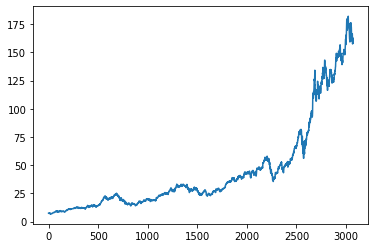

In [15]:
plt.plot(df.Close)

In [16]:
ma100 = df.Close.rolling(100).mean()

In [17]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3065    164.214201
3066    164.379501
3067    164.571401
3068    164.708201
3069    164.827901
Name: Close, Length: 3070, dtype: float64

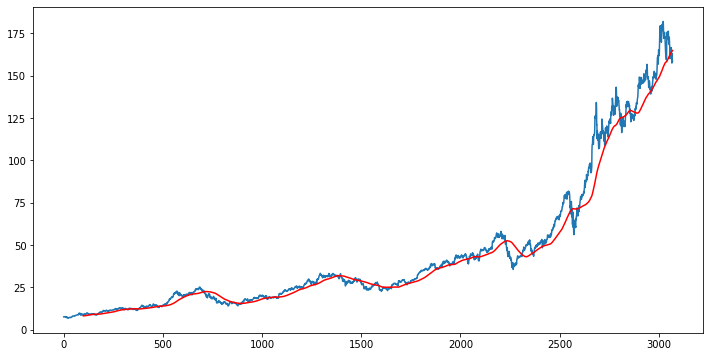

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [21]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3065    152.97180
3066    153.13185
3067    153.31110
3068    153.46920
3069    153.62755
Name: Close, Length: 3070, dtype: float64

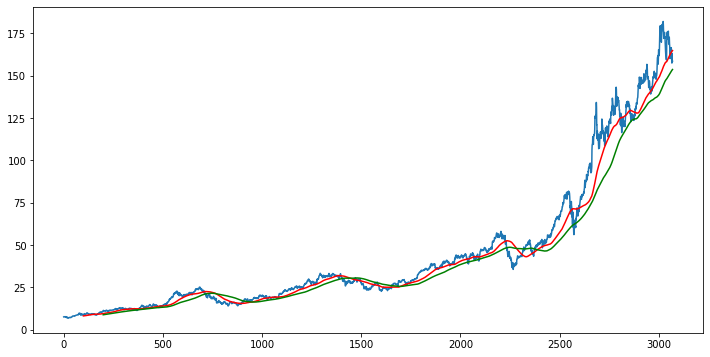

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [23]:
df.shape

(3070, 5)

In [11]:
## Splitting the dataset

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [12]:
data_train.shape, data_test.shape

((2148, 1), (921, 1))

In [13]:
data_train

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714
...,...
2143,47.645000
2144,47.587502
2145,46.970001
2146,47.757500


In [14]:
data_test

,Close
2148,47.727501
2149,47.862499
2150,47.599998
2151,47.970001
2152,47.860001
...,...
3064,163.169998
3065,159.300003
3066,157.440002
3067,162.949997


In [15]:
## Scalling dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_array = scaler.fit_transform(data_train)
data_test_array = scaler.fit_transform(data_test)

In [34]:
data_train_array.shape

(2149, 1)

In [33]:
data_test_array.shape

(921, 1)

In [43]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [46]:
## ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [48]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)              

In [50]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
65/65 [==============================] - 14s 215ms/step - loss: 0.0405
Epoch 2/50
65/65 [==============================] - 13s 202ms/step - loss: 0.0068
Epoch 3/50
65/65 [==============================] - 13s 199ms/step - loss: 0.0056
Epoch 4/50
65/65 [==============================] - 12s 192ms/step - loss: 0.0055
Epoch 5/50
65/65 [==============================] - 14s 209ms/step - loss: 0.0062
Epoch 6/50
65/65 [==============================] - 14s 210ms/step - loss: 0.0057
Epoch 7/50
65/65 [==============================] - 14s 213ms/step - loss: 0.0045
Epoch 8/50
65/65 [==============================] - 14s 212ms/step - loss: 0.0044
Epoch 9/50
65/65 [==============================] - 14s 210ms/step - loss: 0.0047
Epoch 10/50
65/65 [==============================] - 14s 217ms/step - loss: 0.0043
Epoch 11/50
65/65 [==============================] - 14s 214ms/step - loss: 0.0041
Epoch 12/50
65/65 [==============================] - 14s 211ms/step - loss: 0.0045
Epoch 13/50
6

In [51]:
model.save('keras_model.h5')

In [52]:
past_100_days = data_train.tail(100)

In [54]:
final_df_test = past_100_days.append(data_test, ignore_index=True)

In [55]:
final_df_test

,Close
0,43.125000
1,43.875000
2,44.742500
3,44.597500
4,44.529999
...,...
1016,159.300003
1017,157.440002
1018,162.949997
1019,158.520004


In [56]:
input_test_data = scaler.fit_transform(final_df_test)

In [58]:
input_test_data.shape

(1021, 1)

In [60]:
x_test = []
y_test = []

for i in range(100, input_test_data.shape[0]):
    x_test.append(input_test_data[i-100:i])
    y_test.append(input_test_data[i,0])
    

In [61]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [63]:
print(x_test.shape)
print(y_test.shape)

(921, 100, 1)
(921,)


In [64]:
## make prediction

y_pred = model.predict(x_test)

In [65]:
y_pred.shape

(921, 1)

In [69]:
scaler.scale_[0]

0.006827686552345423

In [67]:
scale_factor = 1/0.00682769
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

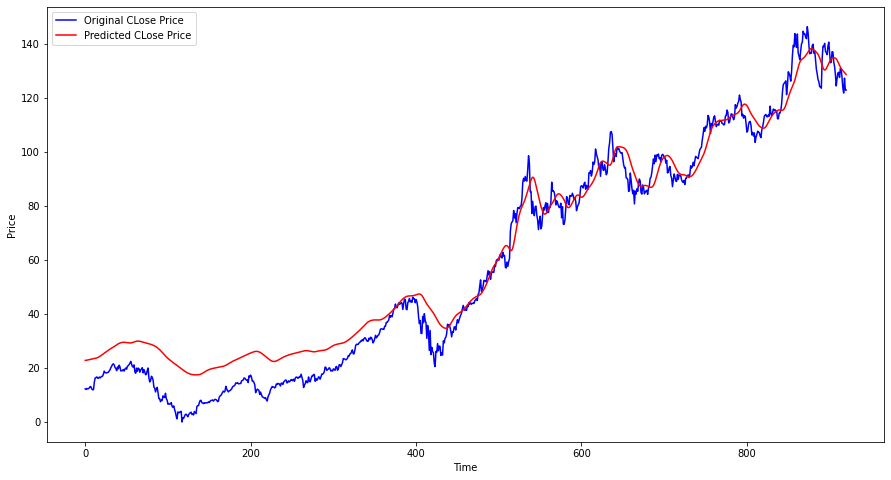

In [68]:
plt.figure(figsize=(15,8))
plt.plot(y_test, 'b', label='Original CLose Price')
plt.plot(y_pred, 'r', label='Predicted CLose Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [98]:
future_predictions = data_test.copy()
for i in range(100):
    new_prediction = model.predict(future_predictions[821+i:]).reshape(1,100,1))
    future_predictions = np.append(future_predictions, new_prediction)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [103]:
future_predictions.iloc[821]

Close    146.550003
Name: 2969, dtype: float64